In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
>>> theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
>>> X_new = np.array([[0], [2]])
>>> X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[4.21509616],
       [9.75532293]])

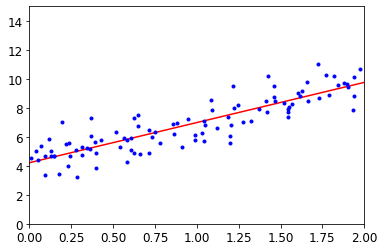

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
>>> lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
>>> theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
>>> theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
>>> np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
>>> theta

array([[4.21509616],
       [2.77011339]])

In [13]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
>>> theta

array([[4.18475289],
       [2.73036719]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
>>> sgd_reg.intercept_, sgd_reg.coef_

(array([4.22609703]), array([2.79227913]))

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False)
>>> X_poly = poly_features.fit_transform(X)
>>> X[0]

array([2.94407494])

In [19]:
>>> X_poly[0]

array([2.94407494, 8.66757727])

In [20]:
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X_poly, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

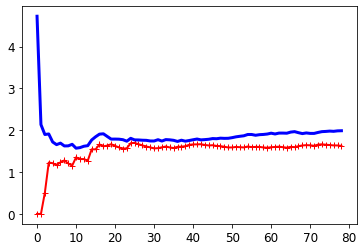

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

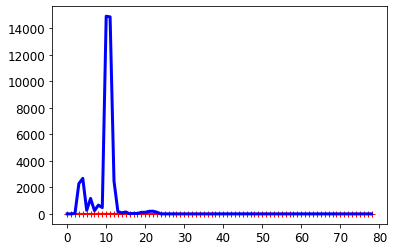

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [24]:
>>> from sklearn.linear_model import Ridge
>>> ridge_reg = Ridge(alpha=1, solver="cholesky")
>>> ridge_reg.fit(X, y)
>>> ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [25]:
>>> sgd_reg = SGDRegressor(penalty="l2")
>>> sgd_reg.fit(X, y.ravel())
>>> sgd_reg.predict([[1.5]])

array([5.08461165])

In [26]:
>>> from sklearn.linear_model import Lasso
>>> lasso_reg = Lasso(alpha=0.1)
>>> lasso_reg.fit(X, y)
>>> lasso_reg.predict([[1.5]])

array([5.04247738])

In [27]:
>>> from sklearn.linear_model import ElasticNet
>>> elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
>>> elastic_net.fit(X, y)
>>> elastic_net.predict([[1.5]])

array([5.04191364])

In [29]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [ ]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> list(iris.keys())

In [ ]:
>>> X = iris["data"][:, 3:]  # petal width
>>> y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

In [ ]:
>>> log_reg.predict([[1.7], [1.5]])

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

In [ ]:
>>> softmax_reg.predict([[5, 2]])

In [ ]:
>>> softmax_reg.predict_proba([[5, 2]])

# Exercises

## 1.  Which Linear Regression training algorithm can you use if you have a set with millions of features?

A Stochastic Gradient Descent or Mini-batch Gradient Descent algorithm is best for this. 

## 2. Suppose the features in your training set have different scales. Which algorithms would suffer from this? What can you do about it?

The Gradient Descent algorithms could suffer from this. One thing you could do is scale the data before training the model.

## 3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model? 

No.

## 4. Do all Gradient Descent models lead to the same model, provided you let them run long enough?

Not exactly. Stochastic and Mini-batch GD will never truly converge, and will produce slightly different models.

## 5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

One possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, you should reduce the learning rate. If the training error is not going up, the model is overfitting, and you should stop training. 

## 6. Is it a good Idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No, since it is random in nature and not guaranteed to make progress at every training iteration.  

## 7. Which Gradient Descent algorithm wuill reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well? 

Stochastic GD generally will reach the vicinity of the global optimum the fastest. Only Batch GD will actually converge, with enough time. Stochastic GD and Mini-batch Gd will bounce around the optimum, unless you gradually reduce the learninig rate. 

## 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large ggao between the training error and the validation error. What is happening? What are three ways to solve this?

If the validation error is much higher than the training error, the model is probably overfitting the training set. One way to fix this is to reduce the polynomial degree. Another thing to try it to regularize the model or try to increase the size of the training set.  

## 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization of hyperparameter alpha or reduce it?

If both the training error and validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has high bias. You should reduce hyperparameter alpha. 

## 10. Why would you want to use:
* Ridge Regression instead of plain Linear Regression?
* Lasso instad of Ridge Regression?
* Elastic Net instead of Lasso?

* Ridge Regression over lasso because a model with regularization typically performs better than a model without. 
* Lasso is better for only a few relevant features, as Lasso leads to sparse models where all weights are zero except the most important weights. If you are not sure, Ridge Regression is the better choice.
* Elastic Net is generally preferred as Lasso can behave erratically. 

## 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifier or one Softmax Regression classifier?

You should implement two Logistic Regression classifiers, since the data are not exclusive classes.

## 12. Implement Batch Gradient Descnet with early stopping for Softmax Regression (without using scikit-learn).

In [30]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [31]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [32]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [33]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Testing Function on first ten instances

In [34]:
y_train[:10]

array([2, 0, 0, 2, 1, 0, 2, 1, 1, 0])

In [35]:
to_one_hot(y_train[:10])

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [36]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Implement Softmax Function:

In [37]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [38]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [39]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 4.294156574055926
500 1.2179212477626977
1000 0.9010687781259029
1500 0.7183486858828102
2000 0.6121638703591391
2500 0.5447594348973491
3000 0.4980867485589635
3500 0.4635657281829027
4000 0.43678106711016534
4500 0.4152532022196556
5000 0.3974799742283357


Model Parameters: 

In [40]:
Theta

array([[ 3.90476982,  0.08559217, -2.13017756],
       [-0.68948125,  0.6485818 ,  0.57943537],
       [-0.94044083, -0.68511523,  0.99937788]])

Check Accuracy score:

In [41]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

Increase Learning Rate:

In [42]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.311025302036567
500 0.5417488329501958
1000 0.5096507866106871
1500 0.5004810353466221
2000 0.497008807611436
2500 0.49556316096292896
3000 0.49493253285036704
3500 0.4946500558145975
4000 0.4945214684255065
4500 0.4944623311132269
5000 0.494434951787758


In [43]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

let's try it again

In [44]:
eta = 0.15
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.043649948520608
500 0.5129070612192324
1000 0.49901434827905483
1500 0.49574217965052225
2000 0.49481673597371817
2500 0.49453780563162225
3000 0.49445117230818747
3500 0.4944238439102878
4000 0.49441515075223896
4500 0.4944123726755799
5000 0.4944114825990443


In [45]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

same result

add early stopping:

In [46]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.214126156819343
500 0.5281027053838044
1000 0.49374496594709627
1500 0.4816668729565305
2000 0.47632093795772074
2500 0.4736989207485126
3000 0.4723152519903316
3500 0.4715408924295288
4000 0.47108612603297106
4500 0.47080841856270417
5000 0.47063353344029824


In [47]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

plot model's prediction on the whole dataset

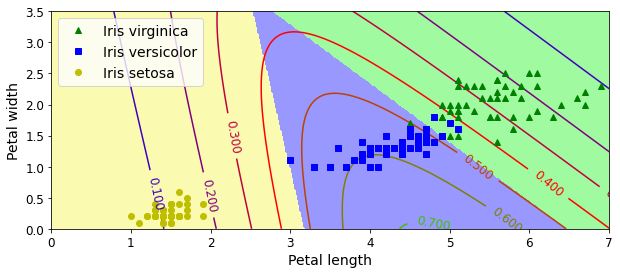

In [48]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

final model's accuracy on the test set: 

In [49]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

1.0

perfect accuracy